In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import random

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

def generate_data(samples=10000, seq_len=10, vocab_size=10):
    X = np.random.randint(1, vocab_size, size=(samples, seq_len))
    y = np.flip(X, axis=1)
    return X, y

vocab_size = 10
seq_len = 10

X, y = generate_data()
X = tf.keras.utils.to_categorical(X, num_classes=vocab_size)
y = tf.keras.utils.to_categorical(y, num_classes=vocab_size)

X_train, y_train = X[:8000], y[:8000]
X_test, y_test = X[8000:], y[8000:]

In [22]:
def build_model(rnn_type='RNN'):
    model = models.Sequential()
    model.add(layers.Input(shape=(seq_len, vocab_size)))

    if rnn_type == 'RNN':
        model.add(layers.SimpleRNN(256, return_sequences=True))
    elif rnn_type == 'LSTM':
        model.add(layers.LSTM(256, return_sequences=True))
    elif rnn_type == 'GRU':
        model.add(layers.GRU(256, return_sequences=True))

    model.add(layers.TimeDistributed(layers.Dense(vocab_size, activation='softmax')))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [23]:
def train_and_evaluate(model_type):
    print(f"\nTraining {model_type} model...")
    model = build_model(model_type)
    history = model.fit(
        X_train, y_train,
        epochs=20,
        batch_size=128,
        validation_split=0.2,
        verbose=0
    )
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"{model_type} Test Accuracy: {test_acc:.4f}")
    return history, test_acc


In [24]:
rnn_history, rnn_acc = train_and_evaluate('RNN')
lstm_history, lstm_acc = train_and_evaluate('LSTM')
gru_history, gru_acc = train_and_evaluate('GRU')



Training RNN model...
RNN Test Accuracy: 0.5568

Training LSTM model...
LSTM Test Accuracy: 0.5219

Training GRU model...
GRU Test Accuracy: 0.5282


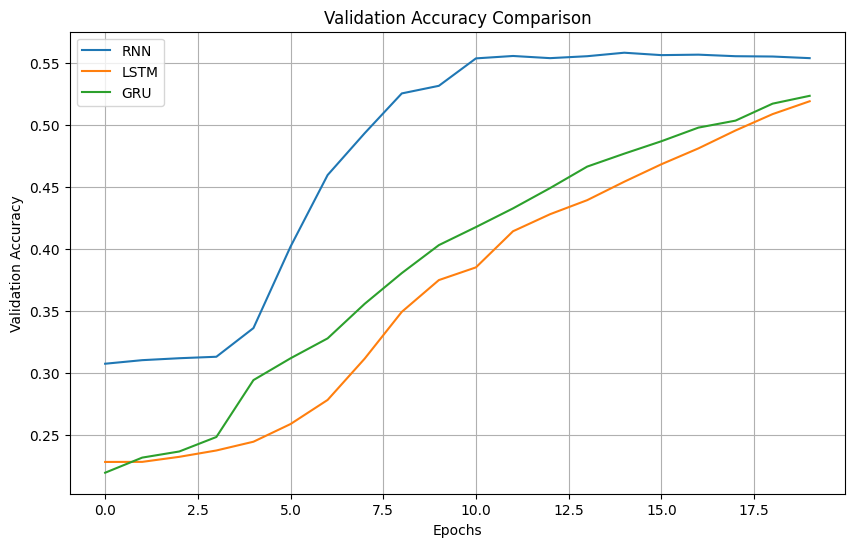

In [27]:
plt.figure(figsize=(10,6))
plt.plot(rnn_history.history['val_accuracy'], label='RNN')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM')
plt.plot(gru_history.history['val_accuracy'], label='GRU')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()









